In [1]:
import numpy as np

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

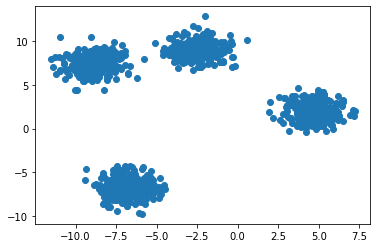

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
from sklearn.cluster import KMeans

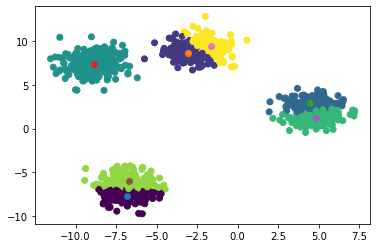

In [5]:
model = KMeans(7)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])

In [6]:
model.cluster_centers_

array([[-6.80941677, -7.73235909],
       [-3.09264958,  8.70496956],
       [ 4.47243506,  2.89110793],
       [-8.86905149,  7.41109218],
       [ 4.82581302,  1.24197123],
       [-6.69093195, -6.0308007 ],
       [-1.66216462,  9.50629132]])

In [7]:
class CustomKMeans:
    
    def __init__(self, n_clusters, n_init=10, max_iter=5):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        
    def fit(self, X):
        self.X = X
        
        procs = []
        
        for proc in range(self.n_init):
            
            clusters = []
            for i in range(self.n_clusters):
                clusters.append(Cluster(random.choice(X)))

            for iter in range(self.max_iter):

                labels = []
                error = 0

                for point in X:

                    distances = []
                    for cluster in clusters:
                        distance = cluster.distance(point)
                        distances.append((distance, cluster))

                    best_index = np.array(distances)[:, 0].argmin()
                    best_cluster = distances[best_index][1]

                    best_cluster.points.append(point)
                    labels.append(best_index)
                    error += distances[best_index][0]


                for cluster in clusters:
                    cluster.reset_center()


            result = {"labels":labels, "clusters":clusters, "error" : error}

            procs.append((error, result))
        
        dict_index = np.array(procs)[:, 0].argmin()
        
        dict_best = procs[dict_index][1]
        
        self.labels_ = dict_best["labels"]
        self.clusters_ = dict_best["clusters"]
        self.error_ = dict_best["error"]
        

class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def reset_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(np.sum((self.center - point)**2))
        
        

In [8]:
k_vals = np.linspace(1, 5, 5, dtype=int)
errors =[]

for k in k_vals:
    m2 = CustomKMeans(k)
    m2.fit(X)
    errors.append(m2.error_)

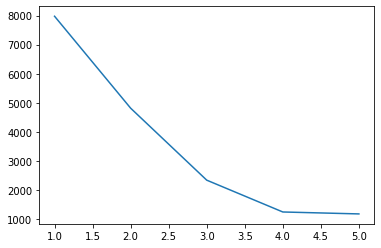

In [9]:
plt.plot(k_vals, errors)

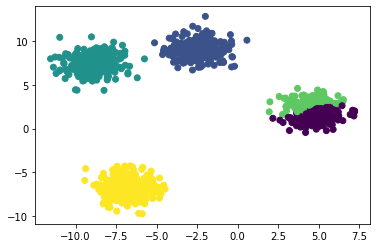

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=m2.labels_)

In [3]:
! which python3

/usr/local/bin/python3


In [4]:
! python3 --version

Python 3.7.0


In [5]:
# to see which python is jupiter running
import platform
print(platform.python_version())

# to see where that python is
import sys
print(sys.executable)

# change python path from
# $ sudo nano /usr/local/share/jupyter/kernels/python3/kernel.json

3.7.0
/usr/local/bin/python3


In [6]:
# ls -al /usr/local/bin/python3 